In [8]:
import nemo.collections.asr as nemo_asr
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"]="0"

NOTE! Installing ujson may make loading annotations faster.


################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [9]:
speaker_id_model = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained('titanet_large', map_location='cuda')
speaker_id_model.eval()

[NeMo I 2022-04-01 08:19:00 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.8.0rc0/titanet-l/492c0ab8416139171dc18c21879a9e45/titanet-l.nemo.
[NeMo I 2022-04-01 08:19:00 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.8.0rc0/titanet-l/492c0ab8416139171dc18c21879a9e45/titanet-l.nemo
[NeMo I 2022-04-01 08:19:00 common:704] Instantiating model from pre-trained checkpoint


[NeMo W 2022-04-01 08:19:00 modelPT:148] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    time_length: 3
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2022-04-01 08:19:00 modelPT:155] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_valida

[NeMo I 2022-04-01 08:19:00 features:255] PADDING: 16
[NeMo I 2022-04-01 08:19:00 features:272] STFT using torch
[NeMo I 2022-04-01 08:19:01 label_models:99] loss is Angular Softmax
[NeMo I 2022-04-01 08:19:02 save_restore_connector:157] Model EncDecSpeakerLabelModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.8.0rc0/titanet-l/492c0ab8416139171dc18c21879a9e45/titanet-l.nemo.


EncDecSpeakerLabelModel(
  (preprocessor): AudioToMelSpectrogramPreprocessor(
    (featurizer): FilterbankFeatures()
  )
  (encoder): ConvASREncoder(
    (encoder): Sequential(
      (0): JasperBlock(
        (mconv): ModuleList(
          (0): MaskedConv1d(
            (conv): Conv1d(80, 80, kernel_size=(3,), stride=(1,), padding=(1,), groups=80, bias=False)
          )
          (1): MaskedConv1d(
            (conv): Conv1d(80, 1024, kernel_size=(1,), stride=(1,), bias=False)
          )
          (2): BatchNorm1d(1024, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (3): SqueezeExcite(
            (fc): Sequential(
              (0): Linear(in_features=1024, out_features=128, bias=False)
              (1): ReLU(inplace=True)
              (2): Linear(in_features=128, out_features=1024, bias=False)
            )
            (gap): AdaptiveAvgPool1d(output_size=1)
          )
        )
        (mout): Sequential(
          (0): ReLU(inplace=True)
          (1

In [3]:
data = pd.read_pickle('YuryDud_TTS_date.pkl')

In [4]:
def get_embed(x):
    return speaker_id_model.get_embedding(x)[0].detach().cpu().numpy()

In [5]:
data[2] = data[0].apply(get_embed)

[NeMo W 2022-04-01 07:53:21 nemo_logging:349] /workspace/byebye/pet_pr/nemo/collections/asr/models/label_models.py:406: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:198.)
      torch.tensor([audio], device=device),
    


In [6]:
data.head()

,0,1,2
0,YD_short/Akunin/short_103.wav,1.360000,"[0.01258327, -0.012259215, 0.0450759, 0.008417..."
1,YD_short/Akunin/short_575.wav,3.764989,"[-0.010214564, 0.0025840353, 0.0146206515, 0.0..."
2,YD_short/Akunin/short_801.wav,1.700000,"[-0.03237643, -0.0018468355, 0.026451822, -0.0..."
3,YD_short/Akunin/short_546.wav,1.875011,"[-0.01923453, 0.03316096, 0.043209393, 0.00600..."
4,YD_short/Akunin/short_844.wav,1.624989,"[-0.014028502, -0.021670034, 0.02382978, 0.015..."


In [10]:
X = [i for i in data[2]]

In [28]:
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X)

In [29]:
plt.figure(figsize=(25, 25))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [30]:
n_samples = len(X)
random_state = 0
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

#### В целом данные однородны за исключением пару выбросов

Text(0.5, 1.0, 'Incorrect Number of Blobs')

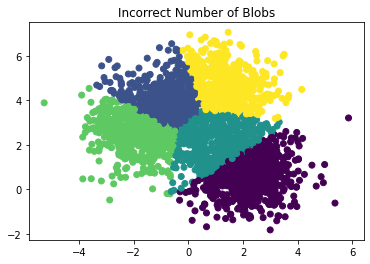

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [33]:
data[3] = y_pred

In [34]:
data.head()

,0,1,2,3
0,YD_short/Akunin/short_103.wav,1.360000,"[0.01258327, -0.012259215, 0.0450759, 0.008417...",2
1,YD_short/Akunin/short_575.wav,3.764989,"[-0.010214564, 0.0025840353, 0.0146206515, 0.0...",2
2,YD_short/Akunin/short_801.wav,1.700000,"[-0.03237643, -0.0018468355, 0.026451822, -0.0...",1
3,YD_short/Akunin/short_546.wav,1.875011,"[-0.01923453, 0.03316096, 0.043209393, 0.00600...",2
4,YD_short/Akunin/short_844.wav,1.624989,"[-0.014028502, -0.021670034, 0.02382978, 0.015...",4


In [38]:
from IPython.display import Audio 
from IPython.core.display import display
import numpy as np
for i in data[3].unique():
    index = [ np.random.randint(0, len(data[data[3] == i])) for j in range(3) ]
    print(f'Number claster is {i}')
    for count in index:
        display(Audio(data[data[3] == i].reset_index(drop=True)[0][count]))

Number claster is 2


Number claster is 1


Number claster is 4


Number claster is 3


Number claster is 0
